<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  b        506 non-null    float64
 12  lstat    506 non-null    float64
 13  medv     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB
迭代次数 0: 损失函数值 = 295.9003161673275
迭代次数 100: 损失函数值 = 47.36006517987399
迭代次数 200: 损失函数值 = 16.297094528054203
迭代次数 300: 损失函数值 = 12.001544885926084
迭代次数 400: 损失函数值 = 11.317462772131528
迭代次数 500: 损失函数值 = 11.149433734227852
迭代次数 600: 损失函数值 =

C:\Users\10075\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 25439 (\N{CJK UNIFIED IDEOGRAPH-635F}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\10075\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 22833 (\N{CJK UNIFIED IDEOGRAPH-5931}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\10075\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 20989 (\N{CJK UNIFIED IDEOGRAPH-51FD}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\10075\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 25968 (\N{CJK UNIFIED IDEOGRAPH-6570}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\10075\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py

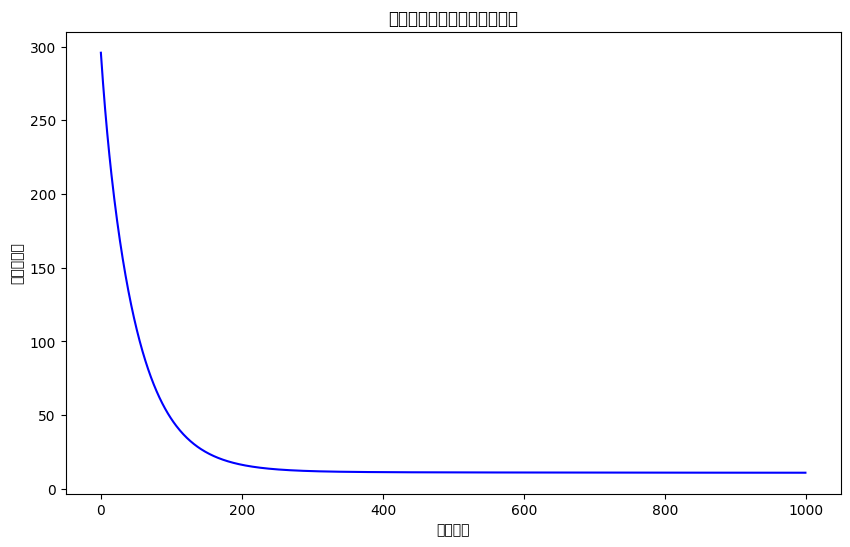

C:\Users\10075\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 39044 (\N{CJK UNIFIED IDEOGRAPH-9884}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\10075\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 27979 (\N{CJK UNIFIED IDEOGRAPH-6D4B}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\10075\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 23454 (\N{CJK UNIFIED IDEOGRAPH-5B9E}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\10075\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 38469 (\N{CJK UNIFIED IDEOGRAPH-9645}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


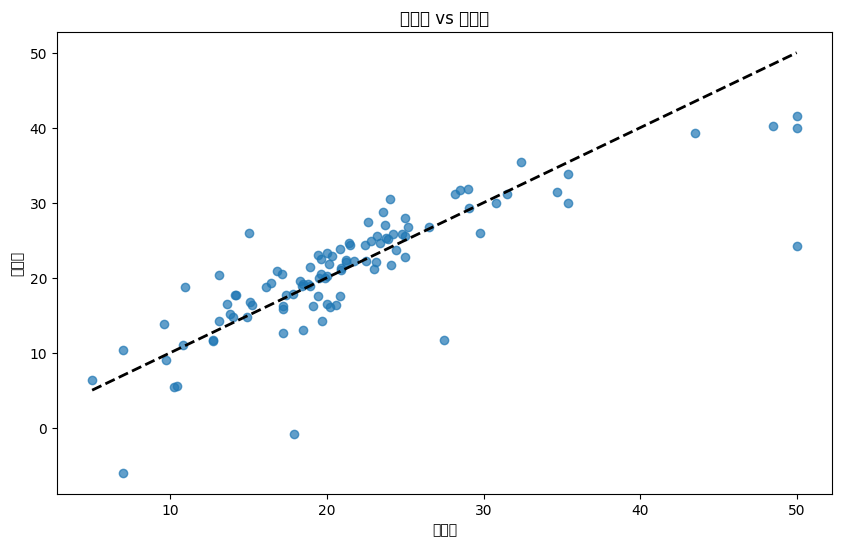

In [9]:
import matplotlib.pyplot as plt  # 数据可视化
import pandas as pd  # 数据处理和分析
import numpy as np  # 科学计算

# 导入必要的机器学习库
from sklearn.model_selection import train_test_split  # 数据集划分
from sklearn.preprocessing import StandardScaler  # 数据标准化
from sklearn.linear_model import LinearRegression  # 线性回归模型
from sklearn.metrics import mean_squared_error, r2_score  # 模型评估

# 影响因素
# CRIM（人均犯罪率） ; NOX（一氧化氮浓度） ; RM（住宅房间数）; AGE（1940年以前建造的住宅比例）; DIS（距离波士顿五个主要就业中心的加权距离）
# RAD（高速公路可达性指数） ; TAX（每万美元的财产税率） ; PTRATIO（师生比）; B（黑人比例） ; LSTAT（低收入人群比例）; MEDV（自住房屋的中位数价格）

# 线性回归适用场景: 房价预测 ； 股票预测 ； 流量预测

# 数据基本处理
# 分割数据
# 特征工程-标准化
# 线性回归
# 模型评估
# 需要导入的API


# 加载数据集
file_path = 'C:\\Users\\10075\\Downloads\\Ai-Study\\DataSet\\Boston Housing.csv'
data = pd.read_csv(file_path)

# 修正目标列名，去除多余空格
data.rename(columns={'medv ': 'medv'}, inplace=True)

# 数据集头部
data.head()

# 数据集基本信息
data.info()


# 数据集的描述性统计信息
data.describe()


# 检查缺失值情况
missing_values = data.isnull().sum()
missing_values


#计算各特征之间的相关性
correlation_matrix = data.corr()
correlation_matrix


# 将数据分为特征变量（X）和目标变量（y）
X = data.drop('medv', axis=1)
y = data['medv']

# 将数据分为训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 特征标准化
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# 添加一列全为1的列作为偏置项
X_train = np.c_[np.ones(X_train.shape[0]), X_train]
X_test = np.c_[np.ones(X_test.shape[0]), X_test]

# 初始化模型参数
theta = np.zeros(X_train.shape[1])

# 定义损失函数（均方误差）
def compute_cost(X, y, theta):
    m = len(y)
    predictions = X.dot(theta)
    cost = (1 / (2 * m)) * np.sum((predictions - y) ** 2)
    return cost

# 梯度下降算法
def gradient_descent(X, y, theta, learning_rate, iterations):
    m = len(y)
    cost_history = []

    for i in range(iterations):
        predictions = X.dot(theta)
        theta = theta - (1 / m) * learning_rate * (X.T.dot(predictions - y))
        cost = compute_cost(X, y, theta)
        cost_history.append(cost)

        # 打印损失函数值
        if i % 100 == 0:
            print(f"迭代次数 {i}: 损失函数值 = {cost}")

    return theta, cost_history

# 设置梯度下降算法的超参数
learning_rate = 0.01
iterations = 1000

# 使用训练集进行梯度下降
theta, cost_history = gradient_descent(X_train, y_train, theta, learning_rate, iterations)

# 训练线性回归模型
model = LinearRegression()
model.fit(X_train, y_train)

# 在测试集上进行预测
y_pred = X_test.dot(theta)


# 评估模型性能
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'均方误差 (MSE): {mse}')
print(f'决定系数 (R²): {r2}')

# 可视化损失函数值随迭代次数的变化
plt.figure(figsize=(10, 6))
plt.plot(range(iterations), cost_history, 'b')
plt.xlabel('迭代次数')
plt.ylabel('损失函数值')
plt.title('损失函数值随迭代次数的变化')
plt.show()

# 可视化预测值与实际值
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('实际值')
plt.ylabel('预测值')
plt.title('实际值 vs 预测值')
plt.show()
